<a href="https://colab.research.google.com/github/Teasotea/IASA_IntelectualDataAnalysis/blob/main/lab5/IAD_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота №5: Побудова ансамблiв моделей класифiкацiї та регресiї засобами бiблiотеки Scikit-Learn Python

Варіант 24

### Звiт має мiстити:
• Результати по кожному пункту ходу виконання роботи, в тому числi оцiнки якостi побудованих моделей,,

• Опис методу побудови ансамблю, який використовувався,

• У текстовому виглядi пояснення отриманих цифр (!).

• Бажано опрацювати матерiал https://scikit-learn.org/stable/modules/ensemble.html. За цим посиланням є описи методiв побудови ансамблiв, якi не увiйшли
до лекцiй, приклади використання методiв.

### Хiд виконання роботи:

1. Початковi 2D-данi представити графiчно.
2. Розбити данi на навчальний, перевiрочний та тестовий набори. Перевiрочний набiр використати для налаштування гiперпараметрiв. Тестовий набiр використати для остаточної оцiнки якостi моделей.

3. Побудувати ансамблi моделей, використовуючи `AdaBoostClassifier`

• В якостi base_estimator / estimators використати одну/ кiлька моделей
iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, svm
тощо.

• Побудувати графiки залежностi значень показника якостi ансамбля та iндивiдуальної моделi вiд n_estimators на однiй координатнiй вiсi. Такий графiк для iндивiдуальної моделi, очевидно, буде горизонтальною прямою.

• В задачах класифiкацiї в якостi показника якостi можна обрати accuracy_score,
f1_score або zero_one_loss. В задачах регресiї показником якостi можна
обрати R2, MAPE або RMSE.

• Оцiнити якiсть ансамблю на основi прикладiв oob (для ансамблiв на основi беггiнгу).


4. В задачах класифiкацiї навести приклад границi рiшень decision boundaries
на основi окремої моделi та ансамблю.
Побудувати графiки на однiй координатнiй площинi (для регресiї):
- прогнозiв на основi ансамблю,
- прогнозiв на основi окремої моделi base_estimator / estimators,
- точок даних з перевiрочної / тестової множин.

5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.

6. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?

7. Зробити висновки. Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?

## Завдання

`AdaBoostClassifier` Розглянути рiзнi значення n_estimators, learning_rate та algorithm.

Початковi данi:
(а) sklearn.datasets.fetch_covtype - це надвеликий набiр. Якщо не вийде працювати з ним цiлком, достатньо сформувати з нього пiднабiр, обираючи елементи випадковим чином. Моделi будувати на сформованому пiднаборi.

# Import Libraries & Load Data

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_covtype
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn import metrics

In [8]:
# dataset A
df = fetch_covtype()

In [9]:
X = pd.DataFrame(df["data"])
Y = pd.DataFrame(df["target"])

In [10]:
X.shape, Y.shape

((581012, 54), (581012, 1))

In [11]:
data = pd.concat([X,Y], axis=1, join="inner")

In [12]:
col = list(data.columns[:-1])
col.append('Y')
data.columns = col
data.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,Y
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


# Exploratory Data Analysis (Data Visualization)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       581012 non-null  float64
 1   1       581012 non-null  float64
 2   2       581012 non-null  float64
 3   3       581012 non-null  float64
 4   4       581012 non-null  float64
 5   5       581012 non-null  float64
 6   6       581012 non-null  float64
 7   7       581012 non-null  float64
 8   8       581012 non-null  float64
 9   9       581012 non-null  float64
 10  10      581012 non-null  float64
 11  11      581012 non-null  float64
 12  12      581012 non-null  float64
 13  13      581012 non-null  float64
 14  14      581012 non-null  float64
 15  15      581012 non-null  float64
 16  16      581012 non-null  float64
 17  17      581012 non-null  float64
 18  18      581012 non-null  float64
 19  19      581012 non-null  float64
 20  20      581012 non-null  float64
 21  21      58

Бачимо, що в даних немає missing values

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,Y
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,...,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2959.533960,155.580500,14.086620,269.356780,46.313840,2346.931360,212.163980,223.35982,142.560900,1982.942100,...,0.089160,0.07836,0.002560,0.003020,0.000140,0.000340,0.026620,0.024100,0.015540,2.048140
std,279.749009,111.947594,7.457948,211.955826,58.321747,1559.693363,26.690889,19.71148,38.161922,1323.281646,...,0.284977,0.26874,0.050532,0.054872,0.011831,0.018436,0.160972,0.153361,0.123688,1.393421
min,1871.000000,0.000000,0.000000,0.000000,-145.000000,0.000000,0.000000,81.00000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1103.000000,199.000000,213.00000,119.000000,1022.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1995.000000,218.000000,226.00000,143.000000,1718.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3165.000000,260.000000,18.000000,390.000000,69.000000,3324.250000,231.000000,237.00000,168.000000,2550.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3856.000000,360.000000,58.000000,1376.000000,598.000000,7079.000000,254.000000,254.00000,253.000000,7172.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


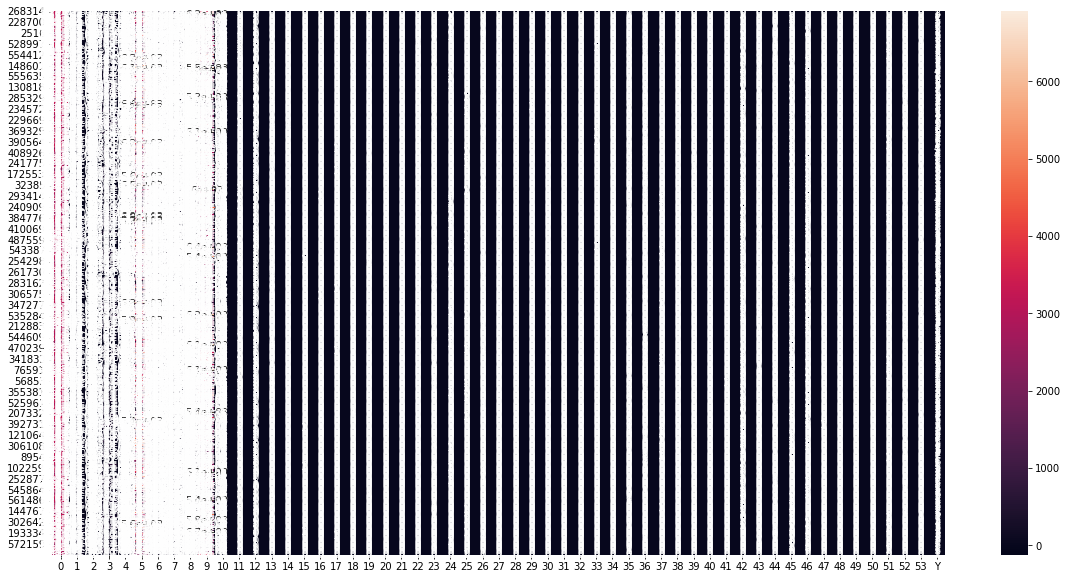

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(data.sample(n=500), annot=True, linewidths=0)

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


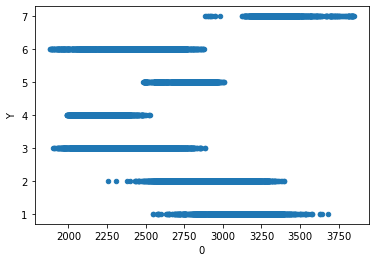

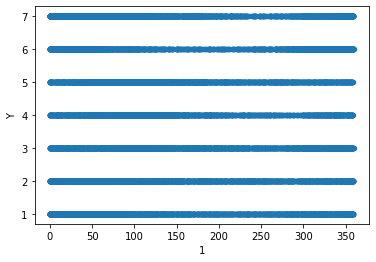

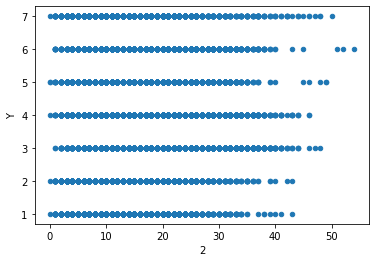

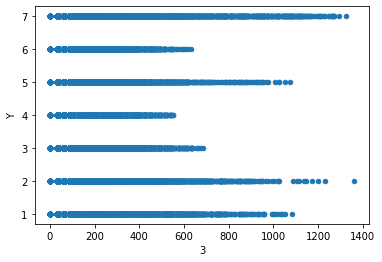

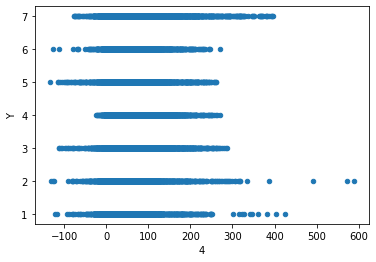

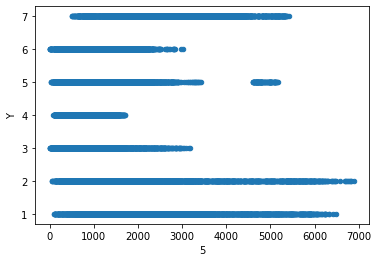

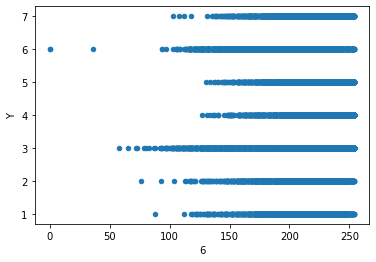

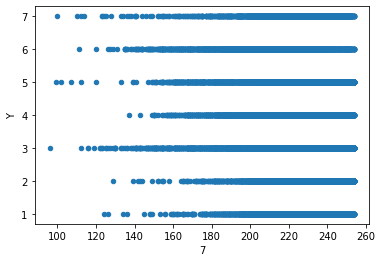

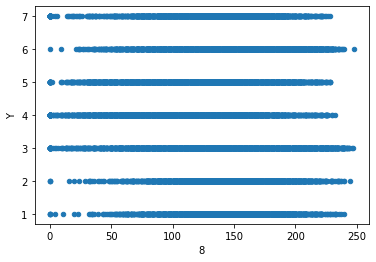

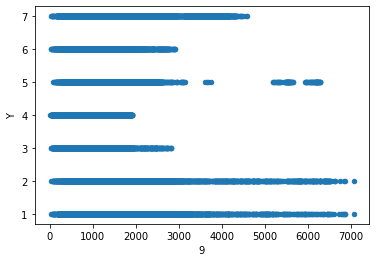

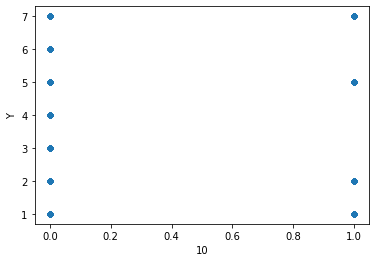

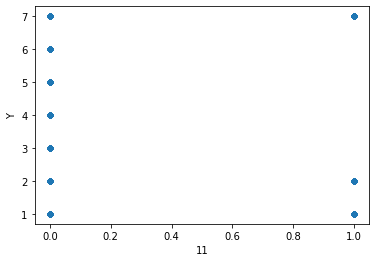

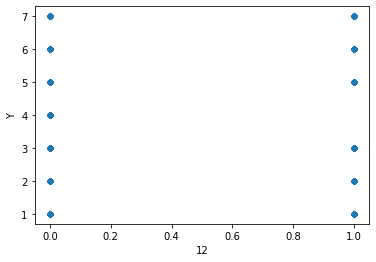

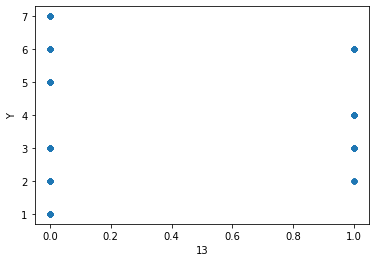

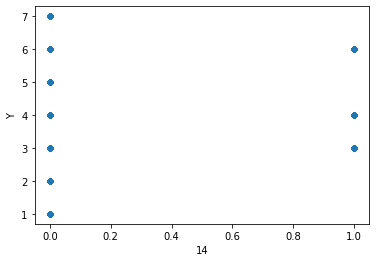

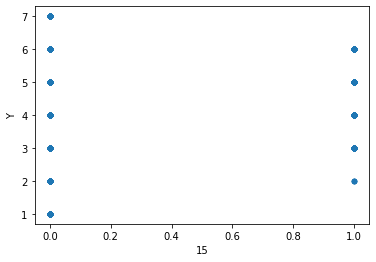

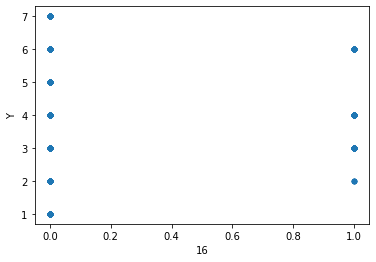

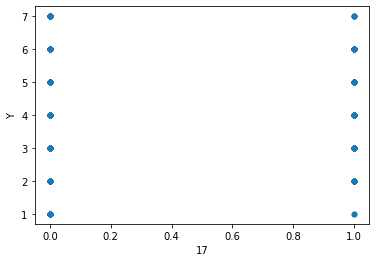

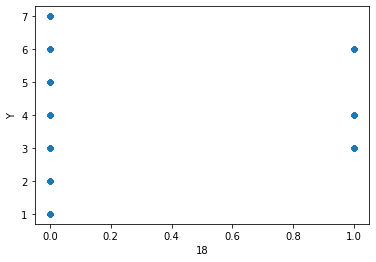

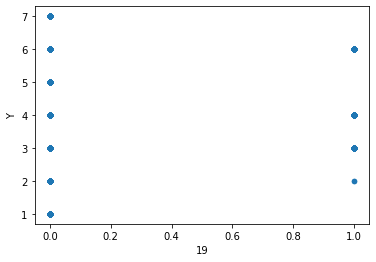

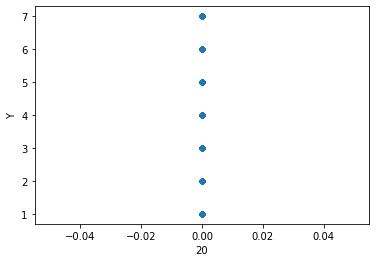

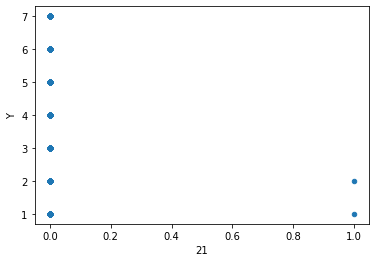

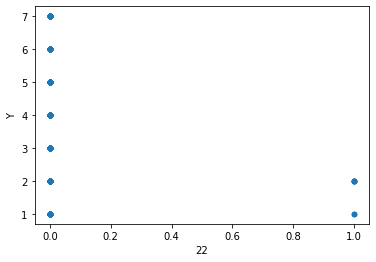

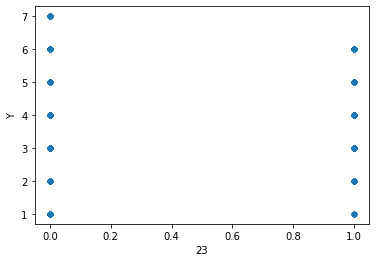

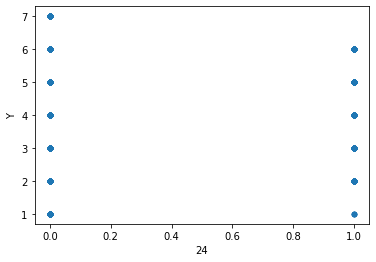

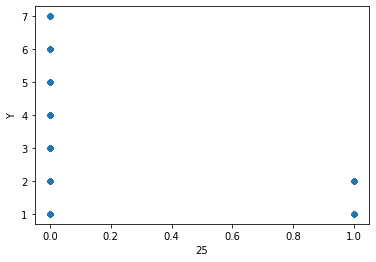

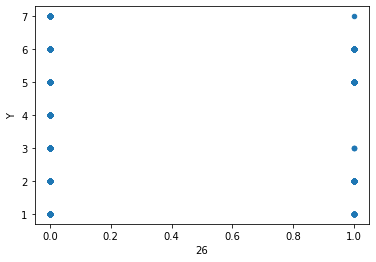

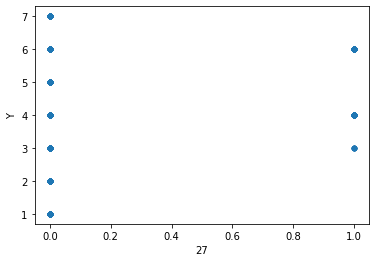

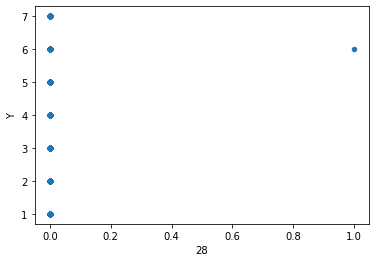

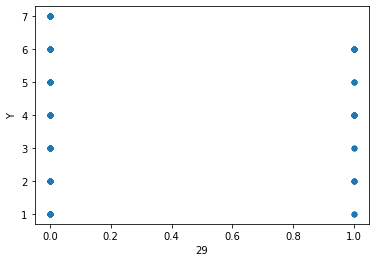

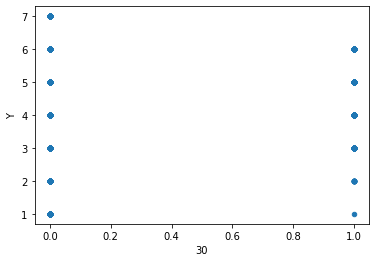

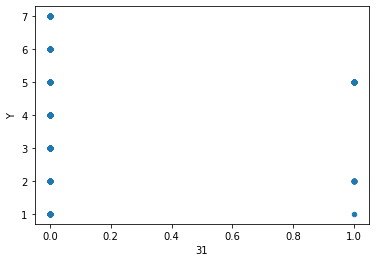

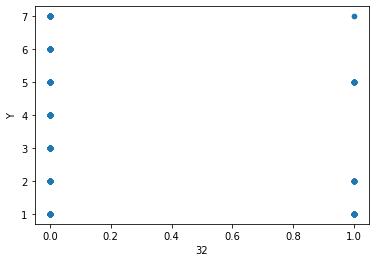

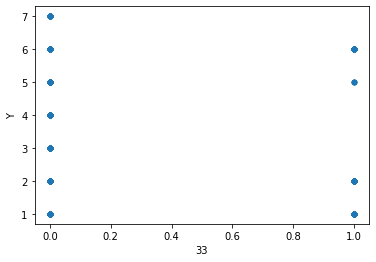

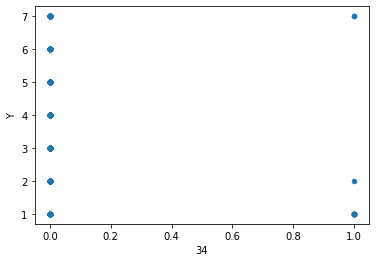

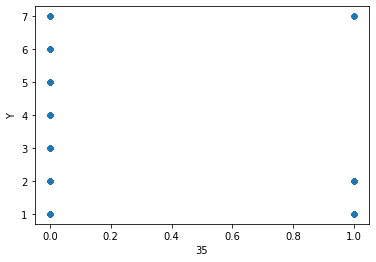

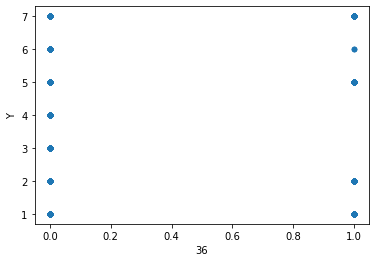

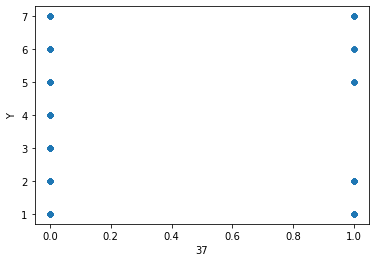

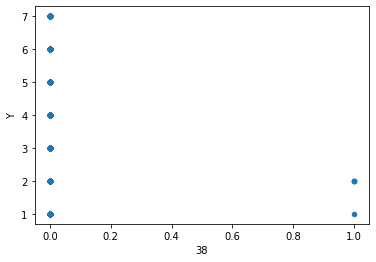

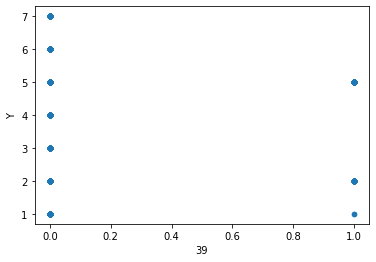

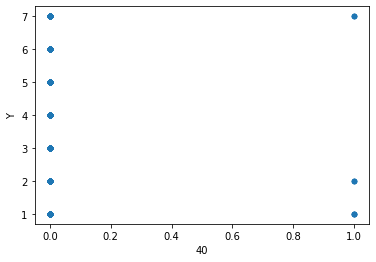

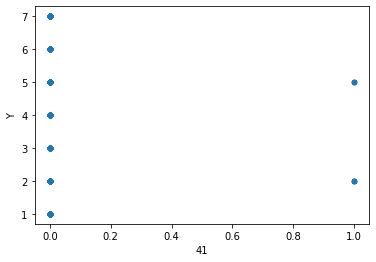

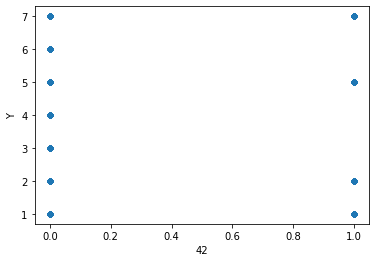

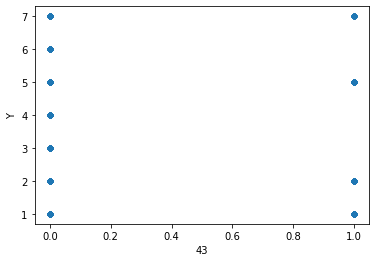

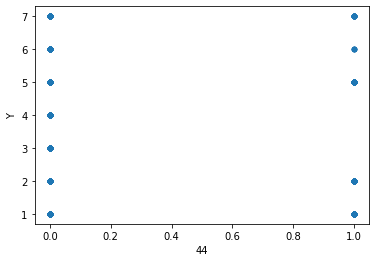

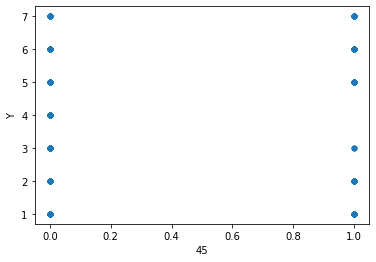

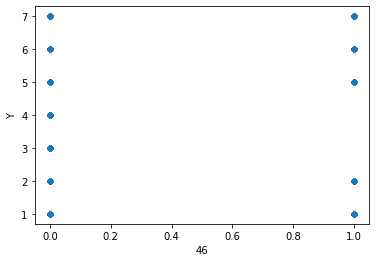

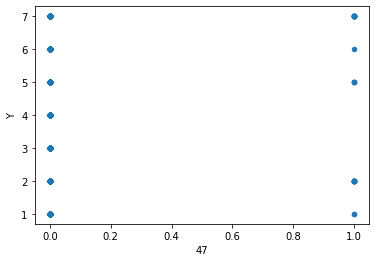

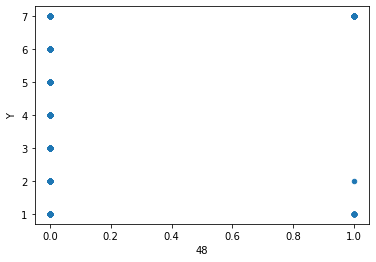

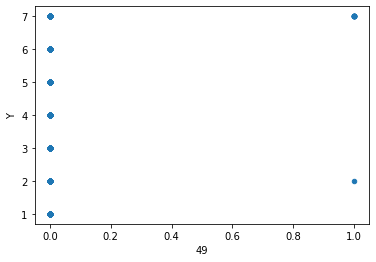

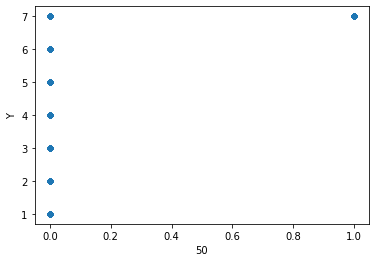

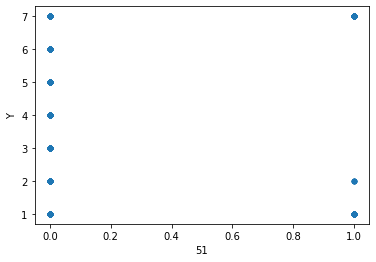

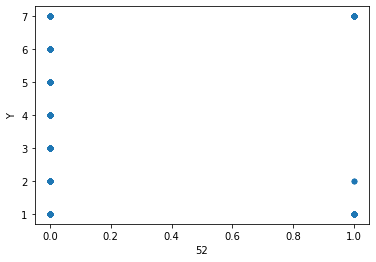

In [36]:
for i in range(53):
  data.plot.scatter(x = i, y = 'Y')

Дізнаємося, які класи присутні в даних

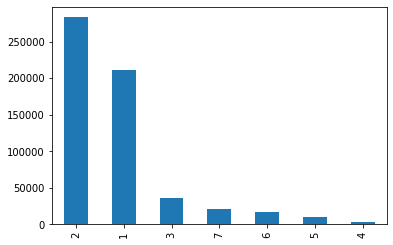

In [ ]:
data['Y'].value_counts().plot.bar()

In [ ]:
data['Y'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Y, dtype: int64

Бачимо, що датасет **незбалансований**.
Оберемо по 2747 прикладів кожного класу, щоб збалансувати його

In [13]:
data = data.groupby('Y').apply(lambda x: x.sample(n=2747))

In [14]:
data.reset_index(drop=True, inplace=True)

In [10]:
data.shape

(19229, 55)

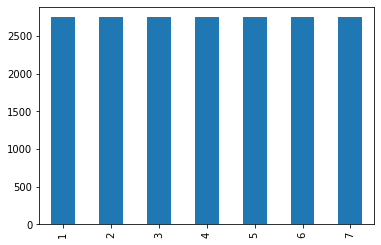

In [11]:
data['Y'].value_counts().plot.bar()

An **AdaBoost classifier** is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Принцип роботи `AdaBoostClassifer`:

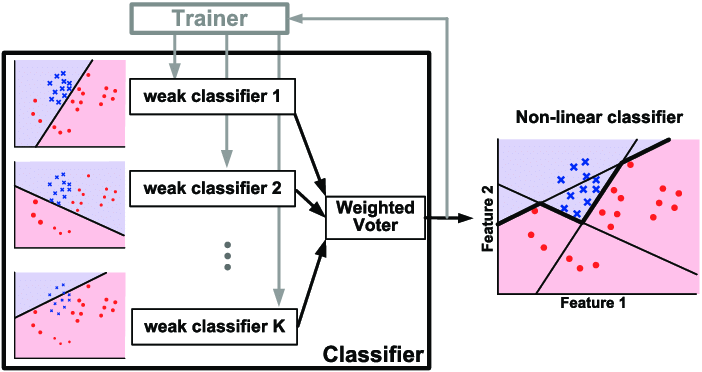

# Split data into train, valid and test

In [15]:
def split_data(X, y, fraction):
    split = np.random.rand(X.shape[0]) > fraction

    X_Train = X[split]
    y_Train = y[split]
    X_Test =  X[~split]
    y_Test = y[~split]

    return X_Train, y_Train, X_Test, y_Test

In [16]:
X_Train, y_Train, X_T, y_T = split_data(data[data.columns[:-1]], data['Y'], fraction = 0.3)
X_Val, y_Val, X_Test, y_Test = split_data(X_T, y_T, fraction = 0.5)

In [17]:
X_Train.shape, y_Train.shape, X_Val.shape, y_Val.shape, X_Test.shape, y_Test.shape

((13555, 54), (13555,), (2869, 54), (2869,), (2805, 54), (2805,))

# Build ensemble AdaBoostClassifier model

In [ ]:
param_grid = [
        {'n_estimators':[1, 10, 50, 100, 200, 350], 
         'learning_rate':[0.05, 0.25, 0.5, 1.0, 2.5],
         'algorithm':['SAMME', 'SAMME.R']
        }
       ]

In [ ]:
clf = GridSearchCV(AdaBoostClassifier(random_state=0), param_grid, cv=3,
                           scoring='f1_weighted', verbose=3)
clf.fit(X_Val, y_Val)


print("Best parameters set found on development set:")
print(clf.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=1;, score=0.133 total time=   0.0s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=1;, score=0.133 total time=   0.0s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=1;, score=0.134 total time=   0.0s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=10;, score=0.133 total time=   0.1s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=10;, score=0.133 total time=   0.1s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=10;, score=0.134 total time=   0.1s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=50;, score=0.262 total time=   0.3s
[CV 2/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=50;, score=0.279 total time=   0.2s
[CV 3/3] END algorithm=SAMME, learning_rate=0.05, n_estimators=50;, score=0.280 total time=   0.2s
[CV 1/3] END algorithm=SAMME, learning_rate=0.05, 

In [12]:
params = {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}

In [22]:
model = AdaBoostClassifier(random_state=0, **params)
model.fit(X_Train, y_Train)

AdaBoostClassifier(algorithm='SAMME', random_state=0)

### Графiки залежностi значень показника якостi моделi вiд n_estimators and leaerning_rate

In [1]:
n_est = [i for i in range(250)]

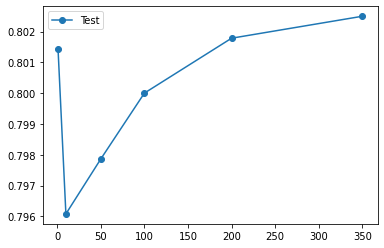

In [27]:
train_scores, test_scores = list(), list()

for i in n_est:
	model_f = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=i)
	model_f.fit(X_Train, y_Train)
 
	test_yhat = model_f.predict(X_Test)
	test_acc = metrics.accuracy_score(y_Test, test_yhat)
	test_scores.append(test_acc)
 
plt.plot(n_est, test_scores, '-o', label='Test')
plt.legend()
plt.show()
     

In [28]:
lr = [0.05, 0.25, 0.5, 1.0, 2.5]

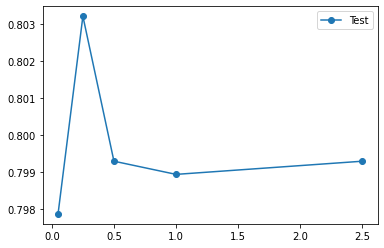

In [30]:
train_scores, test_scores = list(), list()

for i in lr:
	model_f = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), learning_rate=i)
	model_f.fit(X_Train, y_Train)
 
	test_yhat = model_f.predict(X_Test)
	test_acc = metrics.accuracy_score(y_Test, test_yhat)
	test_scores.append(test_acc)
 
plt.plot(lr, test_scores, '-o', label='Test')
plt.legend()
plt.show()

# Predict

In [ ]:
predictions = model.predict(X_Test)

In [ ]:
pred_score = model.predict_proba(X_Test)

In [ ]:
print(metrics.classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           1       0.53      0.50      0.52       381
           2       0.44      0.30      0.36       392
           3       0.35      0.20      0.25       399
           4       0.59      0.84      0.69       445
           5       0.62      0.72      0.66       419
           6       0.39      0.37      0.38       431
           7       0.68      0.84      0.75       376

    accuracy                           0.54      2843
   macro avg       0.52      0.54      0.52      2843
weighted avg       0.51      0.54      0.52      2843



# Cross-validation 

In [ ]:
score = cross_val_score(model, data[data.columns[:-1]],  data["Y"], scoring='f1_weighted', cv = 10)
print(score)

[0.45013169 0.35815365 0.52850933 0.43208435 0.38113541 0.40874732
 0.43896275 0.44536536 0.41066979 0.52235698]


In [ ]:
print(score.mean())

0.43761166209953306


# Evaluation

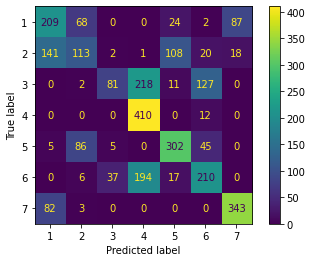

In [ ]:
cm = metrics.confusion_matrix(y_Test, predictions, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
metrics.roc_auc_score(y_Test, pred_score, multi_class = 'ovr', average = 'macro')

0.8733066286022669

# Estimator models comparison


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### DecisionTreeClassifier

In [ ]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, **params)
model.fit(X_Train, y_Train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   random_state=0)

In [ ]:
predictions = model.predict(X_Test)
print(metrics.classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           1       0.67      0.68      0.67       381
           2       0.61      0.59      0.60       392
           3       0.77      0.78      0.77       399
           4       0.92      0.94      0.93       445
           5       0.89      0.89      0.89       419
           6       0.79      0.75      0.77       431
           7       0.91      0.94      0.92       376

    accuracy                           0.80      2843
   macro avg       0.79      0.80      0.79      2843
weighted avg       0.80      0.80      0.80      2843



### LogisticRegression

In [ ]:
model_lr = AdaBoostClassifier(base_estimator = LogisticRegression(solver='lbfgs', max_iter=1000), random_state=0, **params)
model_lr.fit(X_Train, y_Train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(max_iter=1000),
                   random_state=0)

In [ ]:
predictions_lr = model_lr.predict(X_Test)
print(metrics.classification_report(y_Test, predictions_lr))

              precision    recall  f1-score   support

           1       0.58      0.48      0.52       381
           2       0.43      0.51      0.47       392
           3       0.53      0.46      0.49       399
           4       0.81      0.71      0.76       445
           5       0.62      0.53      0.57       419
           6       0.51      0.61      0.56       431
           7       0.75      0.89      0.81       376

    accuracy                           0.60      2843
   macro avg       0.60      0.60      0.60      2843
weighted avg       0.61      0.60      0.60      2843



### SVC

In [ ]:
model_svm = AdaBoostClassifier(base_estimator = SVC(), random_state=0, **params)
model_svm.fit(X_Train, y_Train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), random_state=0)

In [ ]:
predictions_svm = model_lr.predict(X_Test)
print(metrics.classification_report(y_Test, predictions_svm))

              precision    recall  f1-score   support

           1       0.58      0.48      0.52       381
           2       0.43      0.51      0.47       392
           3       0.53      0.46      0.49       399
           4       0.81      0.71      0.76       445
           5       0.62      0.53      0.57       419
           6       0.51      0.61      0.56       431
           7       0.75      0.89      0.81       376

    accuracy                           0.60      2843
   macro avg       0.60      0.60      0.60      2843
weighted avg       0.61      0.60      0.60      2843



Як бачимо,  DecisionTreeClassifier - найкраща estimator model. Надалі продовжимо її використовувати

# Individual model vs AdaBoostClassifier
Тепер порівняємо результати та швидкість тренування з індивідуальною моделлю DecisionTreeClassifier

In [23]:
%%time
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, **params)
model.fit(X_Train, y_Train)

CPU times: user 209 ms, sys: 719 µs, total: 209 ms
Wall time: 214 ms


AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   random_state=0)

In [24]:
predictions = model.predict(X_Test)
print(metrics.classification_report(y_Test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.65      0.66       419
           2       0.64      0.62      0.63       426
           3       0.81      0.72      0.76       422
           4       0.89      0.92      0.90       401
           5       0.86      0.88      0.87       407
           6       0.74      0.80      0.77       395
           7       0.93      0.93      0.93       436

    accuracy                           0.79      2906
   macro avg       0.79      0.79      0.79      2906
weighted avg       0.79      0.79      0.79      2906



In [25]:
%%time
clf = DecisionTreeClassifier()
clf.fit(X_Train, y_Train)

CPU times: user 212 ms, sys: 0 ns, total: 212 ms
Wall time: 295 ms


DecisionTreeClassifier()

In [26]:
predictions_clf = clf.predict(X_Test)
print(metrics.classification_report(y_Test, predictions_clf))

              precision    recall  f1-score   support

           1       0.66      0.65      0.66       419
           2       0.63      0.62      0.63       426
           3       0.78      0.74      0.76       422
           4       0.89      0.93      0.91       401
           5       0.86      0.88      0.87       407
           6       0.76      0.78      0.77       395
           7       0.93      0.93      0.93       436

    accuracy                           0.79      2906
   macro avg       0.79      0.79      0.79      2906
weighted avg       0.79      0.79      0.79      2906



### Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?

Як бачимо, ансамбль буде завжди навчатись повільніше, ніж індивідуальна модель. Це логічно, оскільки тренування ансамблю це тренування декількох моделей

### Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?

Як бачимо, AdaBoostClassifier з бейз естімейтором DecisionTreeClassifier, виконується краще ніж індивідуальна модель DecisionTreeClassifier. Алгоритм AdaBoost здатний покращити результат індив моделі на заданих даних, оскільки з його допомогою кожний новий прогнозатор виправляє свого попередника(трохи більше уваги приділяється навчальним прикладам, на яких у попередника було недонавчання)